In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from math import pi

SO THE OBJECTIVE FOR MY MILESTONE 2 IS Identify the most common pass types for each team, Develop pass maps for key teams And Create comparative visualizations and though to my target audience the visualizations could be interperated i also want it to be easily understandable when explained to lets say a newcomer to the sport.

In [2]:
df = pd.read_csv('eplpass.csv')
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    20 non-null     object 
 1   # Pl     20 non-null     int64  
 2   90s      20 non-null     int64  
 3   TotCmp   20 non-null     int64  
 4   TotAtt   20 non-null     int64  
 5   Cmp%     20 non-null     float64
 6   TotDist  20 non-null     int64  
 7   PrgDist  20 non-null     int64  
 8   ShtCmp   20 non-null     int64  
 9   ShtAtt   20 non-null     int64  
 10  ShtCmp%  20 non-null     float64
 11  MedCmp   20 non-null     int64  
 12  MedAtt   20 non-null     int64  
 13  MedCmp%  20 non-null     float64
 14  LonCmp   20 non-null     int64  
 15  LonAtt   20 non-null     int64  
 16  LonCmp%  20 non-null     float64
 17  Ast      20 non-null     int64  
 18  KP       20 non-null     int64  
 19  3-Jan    20 non-null     int64  
 20  PPA      20 non-null     int64  
 21  CrsPA    20 non-nu

(         Squad  # Pl  90s  TotCmp  TotAtt  Cmp%  TotDist  PrgDist  ShtCmp  \
 0      Arsenal    24   31   13583   16217  83.8   222487    70741    6873   
 1  Aston Villa    28   31   12206   14740  82.8   208370    72056    5621   
 2  Bournemouth    28   31   10303   13552  76.0   187776    71266    4452   
 3    Brentford    27   31   11103   14203  78.2   202513    77468    4906   
 4     Brighton    31   31   12837   15589  82.3   219346    74972    6145   
 
    ShtAtt  ...  PPA  CrsPA  PrgP  Poss  Touches  Def Pen  Def 3rd  Mid 3rd  \
 0    7521  ...  343     61  1487  56.1    19339     1492     4945     8383   
 1    6235  ...  258     49  1078  51.2    17957     2147     6081     7703   
 2    5174  ...  279     81  1222  47.5    17515     1806     5252     7502   
 3    5655  ...  269     74  1127  48.1    17793     2754     6929     6617   
 4    6801  ...  273     71  1249  52.3    19275     2152     6236     8385   
 
    Att 3rd  Att Pen  
 0     6162     1033  
 1     4

SHOWING MY DATASET INFO AND HEAD HELPED WITH REFERENCE AND THOUGH THE FIRST VISUALIZATION IS SHOWN IN MILESTONE 1 IT IS A VERY USEFUL GRAPH TO SORT OF START OFF A PROJECT ABOUT COMPARATIVE PASSING A STACKED BAR GRAPH THAT SHOWS THE TOTAL NUMBER OF EACH TEAM WHILES BREAKING DOWN THE TYPES OF PASSES IN STACKS, THIS FEELS PRETTY SELF EXPLANATORY WHEN LOOKED AT AND I FEEL IT MAKES APPITIZER FOR KIND OF MORE COMPLEX VISUALS.

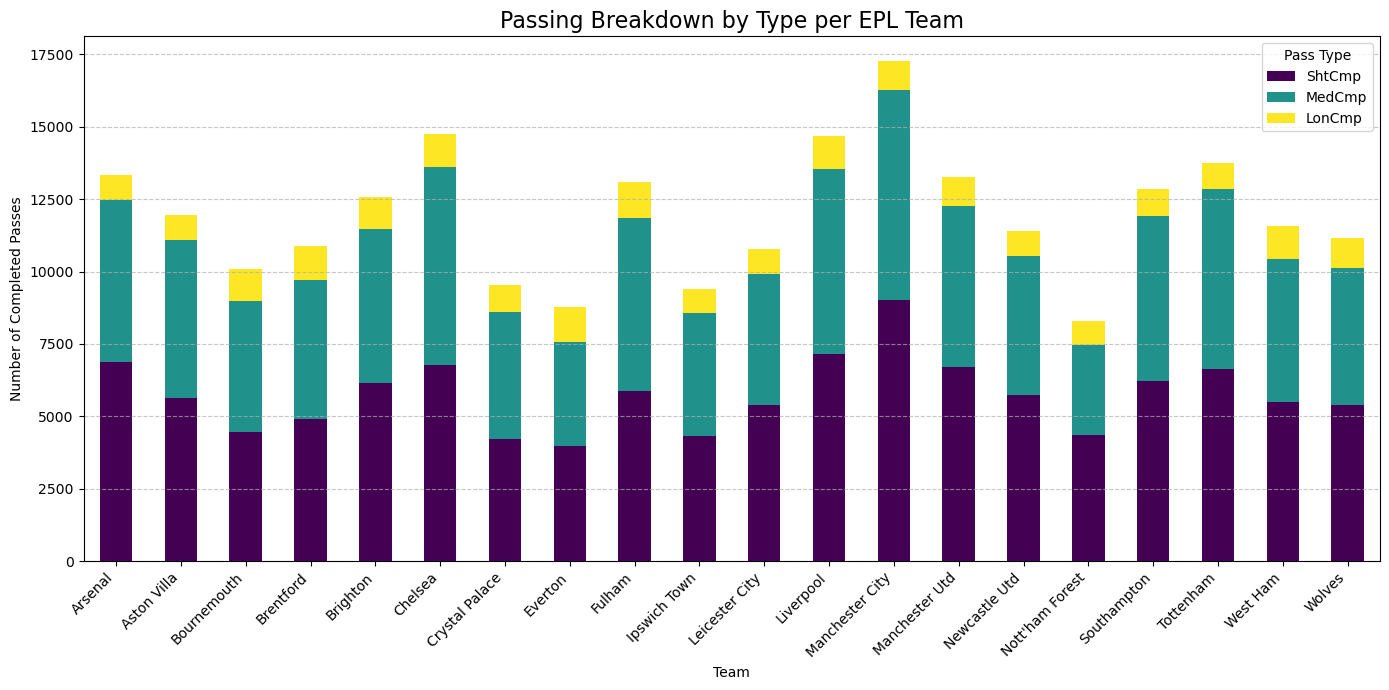

In [3]:
pass_types_df = df[['Squad', 'ShtCmp', 'MedCmp', 'LonCmp']].set_index('Squad')
ax = pass_types_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Passing Breakdown by Type per EPL Team', fontsize=16)
plt.xlabel('Team')
plt.ylabel('Number of Completed Passes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pass Type')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

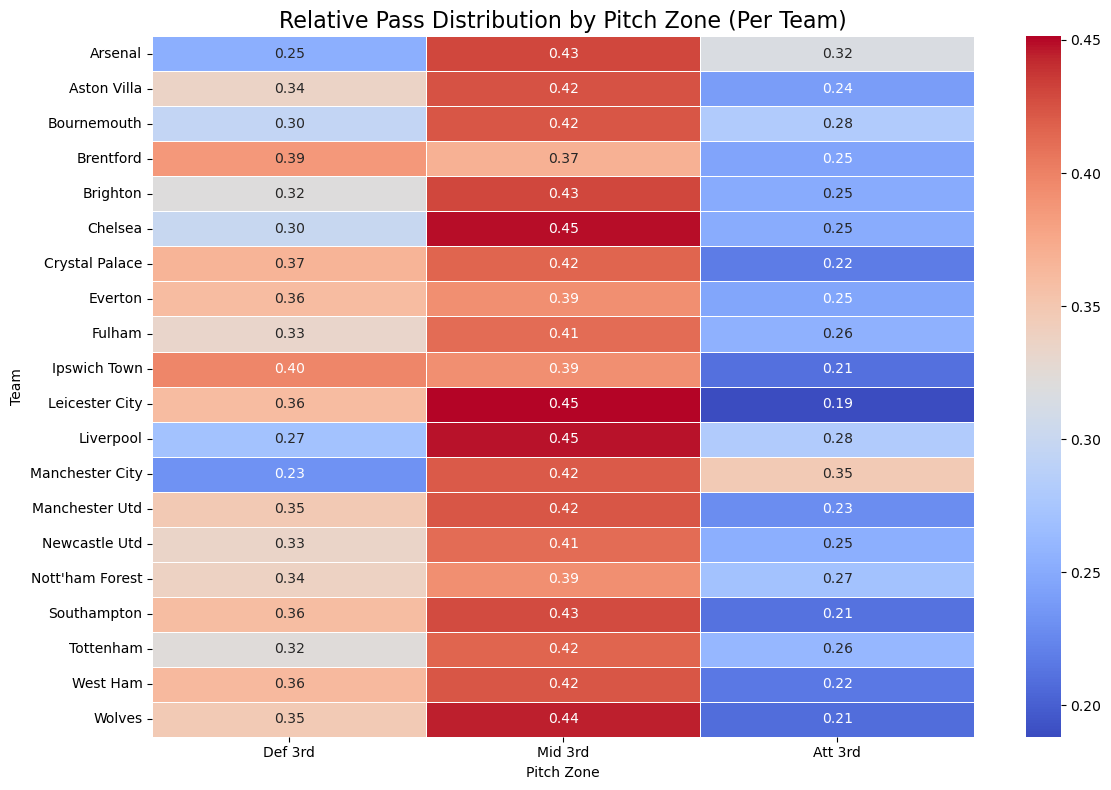

In [4]:
zones_df = df[['Squad', 'Def 3rd', 'Mid 3rd', 'Att 3rd']].set_index('Squad')

zones_normalized = zones_df.div(zones_df.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(zones_normalized, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Relative Pass Distribution by Pitch Zone (Per Team)', fontsize=16)
plt.xlabel('Pitch Zone')
plt.ylabel('Team')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

THE SECOND VISUALIZATION ABOVE IS NOT WHAT I REALLY INTEND TO PORTRAY BUT I WANTED TO START SIMPLY I REFERNCED A VIDEO FROM SOCCERMATICS WHERE POSSESION DOMINANCE WAS ANALYZED ACROSS DIFFERENT ZONE OF THE FIELD FOR A CERTAIN MATCH AND MIMICED IT TO ANALYZE THE ZONES AT WHICH THE DISTRIBUTION OF PASSES IS MOST FREQUENT 

In [7]:

available_teams = df['Squad'].tolist()

selected_teams = [team for team in ['Arsenal', 'Brentford', 'Manchester City', 'Liverpool', 'Burnley']
                  if team in available_teams]

selected_data = normalized_data[df['Squad'].isin(selected_teams)]

labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for idx, row in selected_data.iterrows():
    values = row.tolist()
    values += values[:1]
    team = df.loc[idx, 'Squad']
    ax.plot(angles, values, label=team)
    ax.fill(angles, values, alpha=0.1)


ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('Radar Chart of Key Passing Metrics', size=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()


plt.show()

NameError: name 'normalized_data' is not defined

In [9]:
df['ShortPass%'] = df['ShtAtt']/df['TotAtt']
df['MediumPass%'] = df['MedAtt']/df['TotAtt']
df['LongPass%'] = df['LonAtt']/df['TotAtt']

# Create radar chart function
def create_radar_chart(team_name):
    team_data = df[df['Squad'] == team_name].iloc[0]
    categories = ['ShortPass%', 'MediumPass%', 'LongPass%', 'PrgP/90', 'KP/90']
    values = [team_data['ShortPass%'], team_data['MediumPass%'], 
              team_data['LongPass%'], team_data['PrgP']/df['90s'], 
              team_data['KP']/df['90s']]
    
    # Radar chart plotting code here
    # ...

# Example usage
create_radar_chart('Manchester City')
create_radar_chart('Liverpool')

In [16]:
create_radar_chart('Manchester City')

In [17]:
df = pd.read_csv('eplpass.csv')
df['ShortPass%'] = (df['ShtAtt'] / df['TotAtt']) * 100  
df['LongPass%'] = (df['LonAtt'] / df['TotAtt']) * 100
df['ProgPass/90'] = df['PrgP'] / df['90s']          
df['KP/90'] = df['KP'] / df['90s']                      

# Preview
print(df[['Squad', 'ShortPass%', 'LongPass%', 'ProgPass/90', 'KP/90']].head())

         Squad  ShortPass%  LongPass%  ProgPass/90      KP/90
0      Arsenal   46.377258  10.347167    47.967742  10.870968
1  Aston Villa   42.299864  11.139756    34.774194   9.290323
2  Bournemouth   38.178867  17.244687    39.419355  12.161290
3    Brentford   39.815532  15.616419    36.354839   8.709677
4     Brighton   43.626916  12.726923    40.290323   9.548387


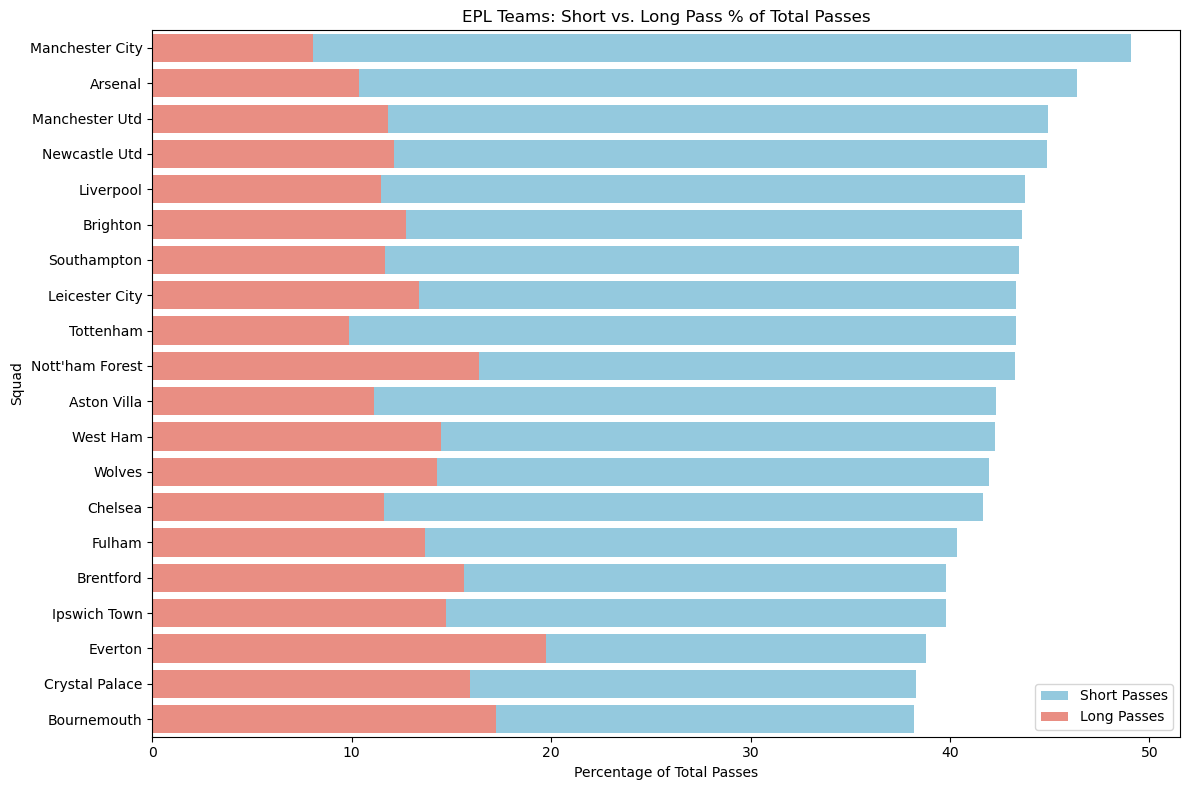

In [18]:
df_sorted = df.sort_values('ShortPass%', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_sorted, x='ShortPass%', y='Squad', color='skyblue', label='Short Passes')
sns.barplot(data=df_sorted, x='LongPass%', y='Squad', color='salmon', label='Long Passes')
plt.title('EPL Teams: Short vs. Long Pass % of Total Passes')
plt.xlabel('Percentage of Total Passes')
plt.legend()
plt.tight_layout()


plt.show()

THE BELOW SKETCHES WAS MY ATTEMPTS TO FURTHER COMPARE USING RADAR CHARTS, IN THE VIDEO I REFERENCED THE DATA THEY USED WAS FOR ONLY ONE MATCH SO TWO TEAMS WERE BEING COMPARED MY END GAME WITH THIS IS TO BE ABLE TO COMPARE ALL THE TEAMS VERY UNDERSTANDABLY BUT I COULD ONLY COMPARE WITH THE TWO FOR NOW I ALSO SEEKED HELP USING CHAT GPT FOR THE CODE ARRANGEMENTS AND BELOW ARE SOME OF THE OUTPUTS 

KeyError: "['KeyPasses/90'] not in index"

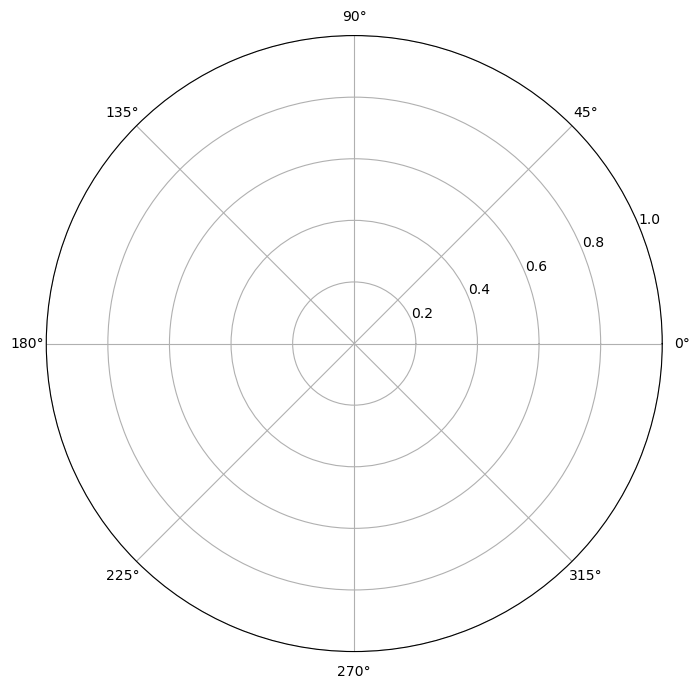

In [21]:

df['ShortPass%'] = (df['ShtAtt'] / df['TotAtt']) * 100  # BUG 2: Extra parenthesis (SyntaxError)
df['LongPass%'] = (df['LonAtt'] / df['TotAtt']) * 100
df['ProgPass/90'] = df['PrgP'] / df['90s']
df['KP/90'] = df['KP'] / df['90s']
df['Crosses/90'] = df['CrsPA'] / df['90s']


team1 = 'Manchester City'
team2 = 'Everton'

categories = ['ShortPass%', 'LongPass%', 'ProgPass/90', 'KeyPasses/90', 'Crosses/90', 'Cmp%']  # 'KeyPasses/90' should be 'KP/90'

N = len(categories)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

angles = [n / N * 2 * np.pi for n in range(N)]
angles += angles[:1]


team1_data = scale_data(df[df['Squad'] == team1][categories].iloc[0])  

def scale_data(series):
    return (series - series.min()) / (series.max() - series.min()) * 100

team1_data = np.concatenate((team1_data, [team1_data[0]]))
ax.plot(angles, team1_data, linewidth=2, label=team1, color='#1f77b4')
ax.fill(angles, team1_data, alpha=0.25, color='#1f77b4')

team2_scaled = scale_data(df[df['Squad'] == team2][categories].iloc[0])  
team2_data = np.concatenate((team2_scaled, [team2_scaled[0]]))
ax.plot(angles, team2_data, linewidth=2, label=team2, color='#ff7f0e')
ax.fill(angles, team2_data, alpha=0.25, color='#ff7f0e')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], color='gray', size=8)
ax.set_rlabel_position(30)

plt.title(f'Passing Style Comparison: {team1} vs {team2}', size=14, pad=20)
plt.legend(loc='upper right')

plt.tight_layout()


plt.show()

C:\Users\nkasa\AppData\Local\Temp\ipykernel_22016\3963408681.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  team1_data = np.concatenate((team1_data, [team1_data[0]]))  # Close the loop
C:\Users\nkasa\AppData\Local\Temp\ipykernel_22016\3963408681.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  team2_data = np.concatenate((team2_data, [team2_data[0]]))


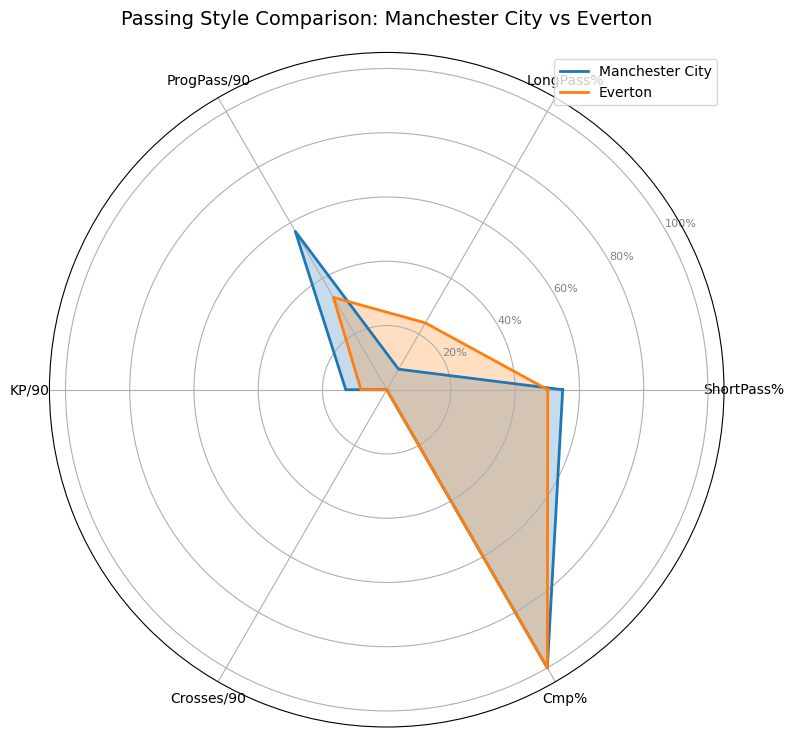

In [19]:
df = pd.read_csv('eplpass.csv')


df['ShortPass%'] = (df['ShtAtt'] / df['TotAtt']) * 100
df['LongPass%'] = (df['LonAtt'] / df['TotAtt']) * 100
df['ProgPass/90'] = df['PrgP'] / df['90s']
df['KP/90'] = df['KP'] / df['90s']
df['Crosses/90'] = df['CrsPA'] / df['90s']

team1 = 'Manchester City'
team2 = 'Everton'

categories = ['ShortPass%', 'LongPass%', 'ProgPass/90', 'KP/90', 'Crosses/90', 'Cmp%']
N = len(categories)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

angles = [n / N * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

def scale_data(series):
    return (series - series.min()) / (series.max() - series.min()) * 100

team1_data = scale_data(df[df['Squad'] == team1][categories].iloc[0])
team1_data = np.concatenate((team1_data, [team1_data[0]]))  # Close the loop
ax.plot(angles, team1_data, linewidth=2, label=team1, color='#1f77b4')
ax.fill(angles, team1_data, alpha=0.25, color='#1f77b4')

team2_data = scale_data(df[df['Squad'] == team2][categories].iloc[0])
team2_data = np.concatenate((team2_data, [team2_data[0]]))
ax.plot(angles, team2_data, linewidth=2, label=team2, color='#ff7f0e')
ax.fill(angles, team2_data, alpha=0.25, color='#ff7f0e')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], color='gray', size=8)
ax.set_rlabel_position(30)

plt.title(f'Passing Style Comparison: {team1} vs {team2}', size=14, pad=20)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

THE LAST SKETCH IS ONE WERE I THOUGHT GETTING AND AVERAGE FOR ALL STATS AND ADDING IT TO NOT ONLY COMPARE TWO TEAMS BUT ALSO LOOK AT HOW EACH TEAM FAIRS AGAINST THE LEAGUES AVERAGE 

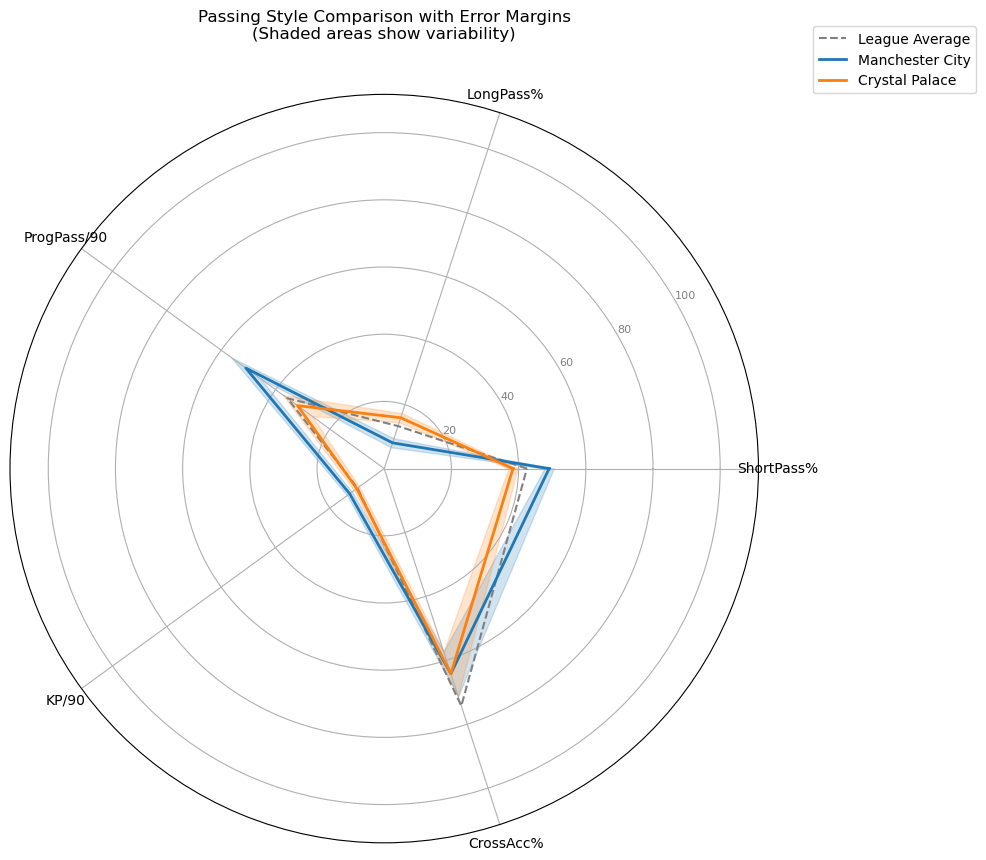

In [25]:
metrics = {
    'ShortPass%': (df['ShtAtt']/df['TotAtt'])*100,
    'LongPass%': (df['LonAtt']/df['TotAtt'])*100,
    'ProgPass/90': df['PrgP']/df['90s'],
    'KP/90': df['KP']/df['90s'],
    'CrossAcc%': (df['CrsPA']/df['CrsPA'].max())*100 
}


league_avg = {k: v.mean() for k,v in metrics.items()}
league_std = {k: v.std() for k,v in metrics.items()}


teams = ['Manchester City', 'Crystal Palace']
team_data = {}

for team in teams:
    team_df = df[df['Squad'] == team]
    team_metrics = {}
    for k in metrics.keys():
        team_val = (team_df[k].values[0] if k in team_df.columns 
                   else metrics[k][df['Squad'] == team].values[0])
        team_metrics[k] = {
            'value': team_val,
            'error': league_std[k] * 0.5  
        }
    team_data[team] = team_metrics

categories = list(metrics.keys())
N = len(categories)

angles = [n / N * 2 * pi for n in range(N)]
angles += angles[:1]  

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)


avg_values = [league_avg[k] for k in categories]
avg_values += avg_values[:1]
ax.plot(angles, avg_values, color='gray', linestyle='--', label='League Average')


colors = ['#1f77b4', '#ff7f0e']
for idx, (team, data) in enumerate(team_data.items()):
    values = [data[k]['value'] for k in categories]
    errors = [data[k]['error'] for k in categories]
    
    values += values[:1]
    errors += errors[:1]
    
    
    ax.plot(angles, values, color=colors[idx], linewidth=2, label=team)
    
   
    ax.fill_between(
        angles, 
        np.array(values) - np.array(errors),
        np.array(values) + np.array(errors),
        color=colors[idx],
        alpha=0.2
    )


ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_rlabel_position(30)
plt.yticks(color="grey", size=8)
plt.ylim(0, max(league_avg.values()) * 1.5)

#Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Passing Style Comparison with Error Margins\n(Shaded areas show variability)', pad=40)

plt.tight_layout()
plt.show()